# Count Space Competition

In this notebook, I tried to predict the location of earthquake :
   1. Heatmaps and pairplot (warm up)
   2. Anlayze the astronauts data and see gender gap (warm up)
   3. Try to see how to any correlation from Earthquakes with other data
    - UFO sightings and Earth's earthquakes location
    - Fireball and UFO sightings comparison
    - Meteorite and UFO comparison
    - Meteorite and Earthquake comparison
   4. use LINEAR REGRESSION to predict Latitude where earthquake will occur based on the rest of data (98% accurate)
 
Conclusion: Moon Phase and each planet's House Number seems to affect the location of earthquake the most 


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading csv's in to DataFrames

In [2]:
exoplanets_df = pd.read_csv("exoplanets.csv")
astronauts_df = pd.read_csv('astronauts.csv')
fireball_df = pd.read_csv('Fireball Reports.csv')
meteorite_df = pd.read_csv('Meteorite_Landings.csv')
earthquakes_df = pd.read_csv('SolarSystemAndEarthquakes.csv')
ufo_df = pd.read_csv('UFO_Sightings_Global.csv')

/Users/limwenhau/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
exoplanets_df.head(2)

,loc_rowid,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_bmassprov,pl_radj,pl_dens,st_teff,st_mass,st_rad,rowupdate,pl_facility,last_updated
0,1,11 Com,b,11 Com b,Radial Velocity,1,326.03000,1.29,0.231,NaN,19.40,Msini,NaN,NaN,4742.0,2.70,19.00,2014-05-14,Xinglong Station,2014-05-14
1,2,11 UMi,b,11 UMi b,Radial Velocity,1,516.21997,1.53,0.080,NaN,14.74,Msini,NaN,NaN,4213.0,2.78,29.79,2018-09-06,Thueringer Landessternwarte Tautenburg,2018-09-06


In [4]:
astronauts_df.head(2)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN


In [5]:
fireball_df.head(2)

,DateTime of Peak Brightness,Latitude,Longitude,Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2009-11-21 20:53:00,-22.0,29.2,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.00
1,2015-01-09 10:41:11,2.0,28.8,36.0,NaN,-10.7,-7.6,11.6,139000000000,0.41


In [6]:
meteorite_df.head(2)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"


In [7]:
earthquakes_df.head(2)

,earthquake.time,earthquake.latitude,earthquake.longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,...,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber
0,2016-04-29T01:33:38.940Z,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,...,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499
1,2016-04-28T19:33:24.420Z,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,...,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618


In [8]:
ufo_df.head(2)

,day_sighted,time,Shape,duration (s),Location,country,description,latitude,longitude,State/Region
0,2019-01-31,21:00:00,light,600.0,"Las vegas, NV",United States,Pink light in sky making light orbs you could ...,36.175,-115.136389,Nevada
1,2019-01-31,20:27:00,other,NaN,"Lumpkin, GA",United States,Unidentifiable shape hovering over field in Lu...,32.0508,-84.799167,Georgia


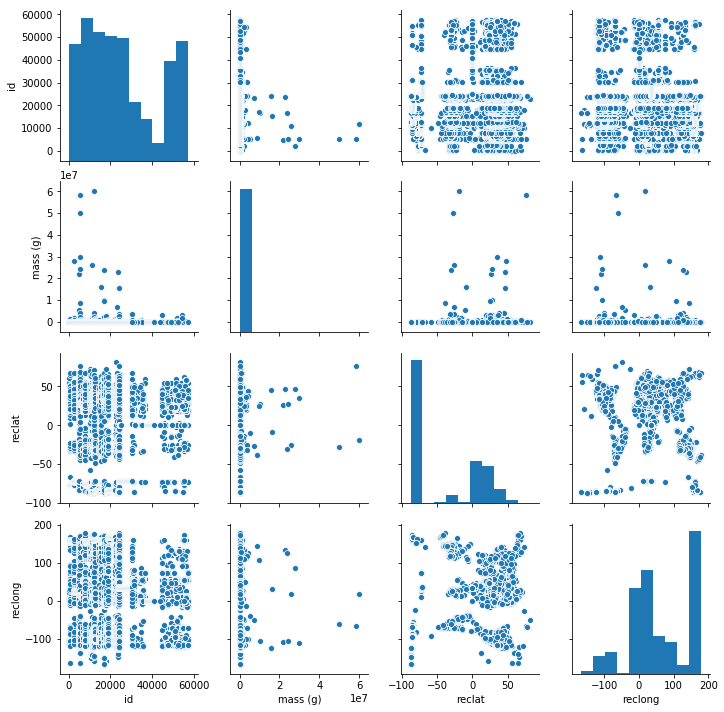

In [12]:
meteorite_df=meteorite_df.dropna()
sns.pairplot(meteorite_df)

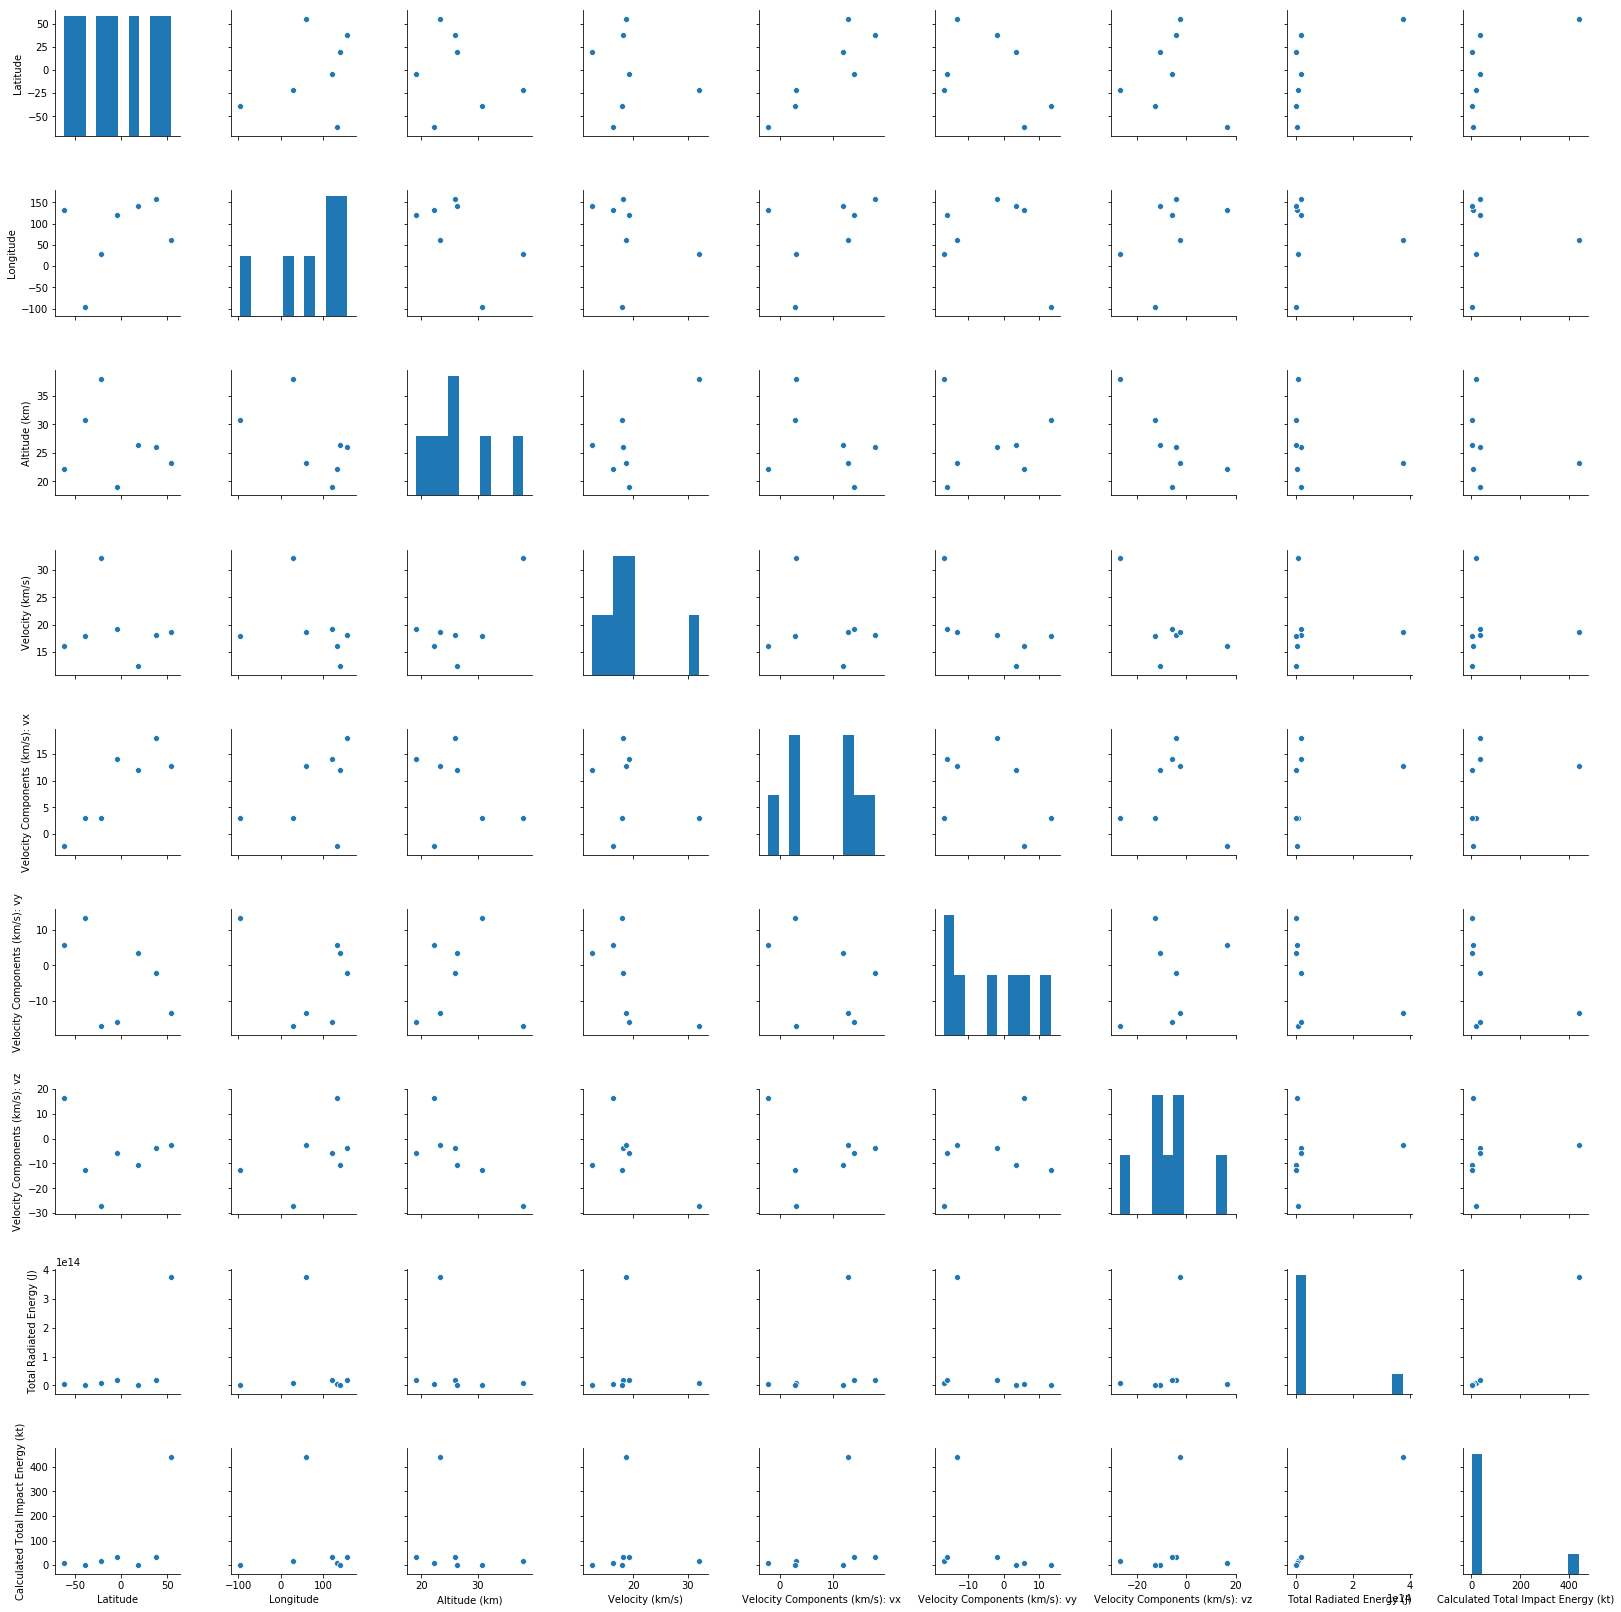

In [13]:
fireball_df = fireball_df.dropna()
sns.pairplot(fireball_df)

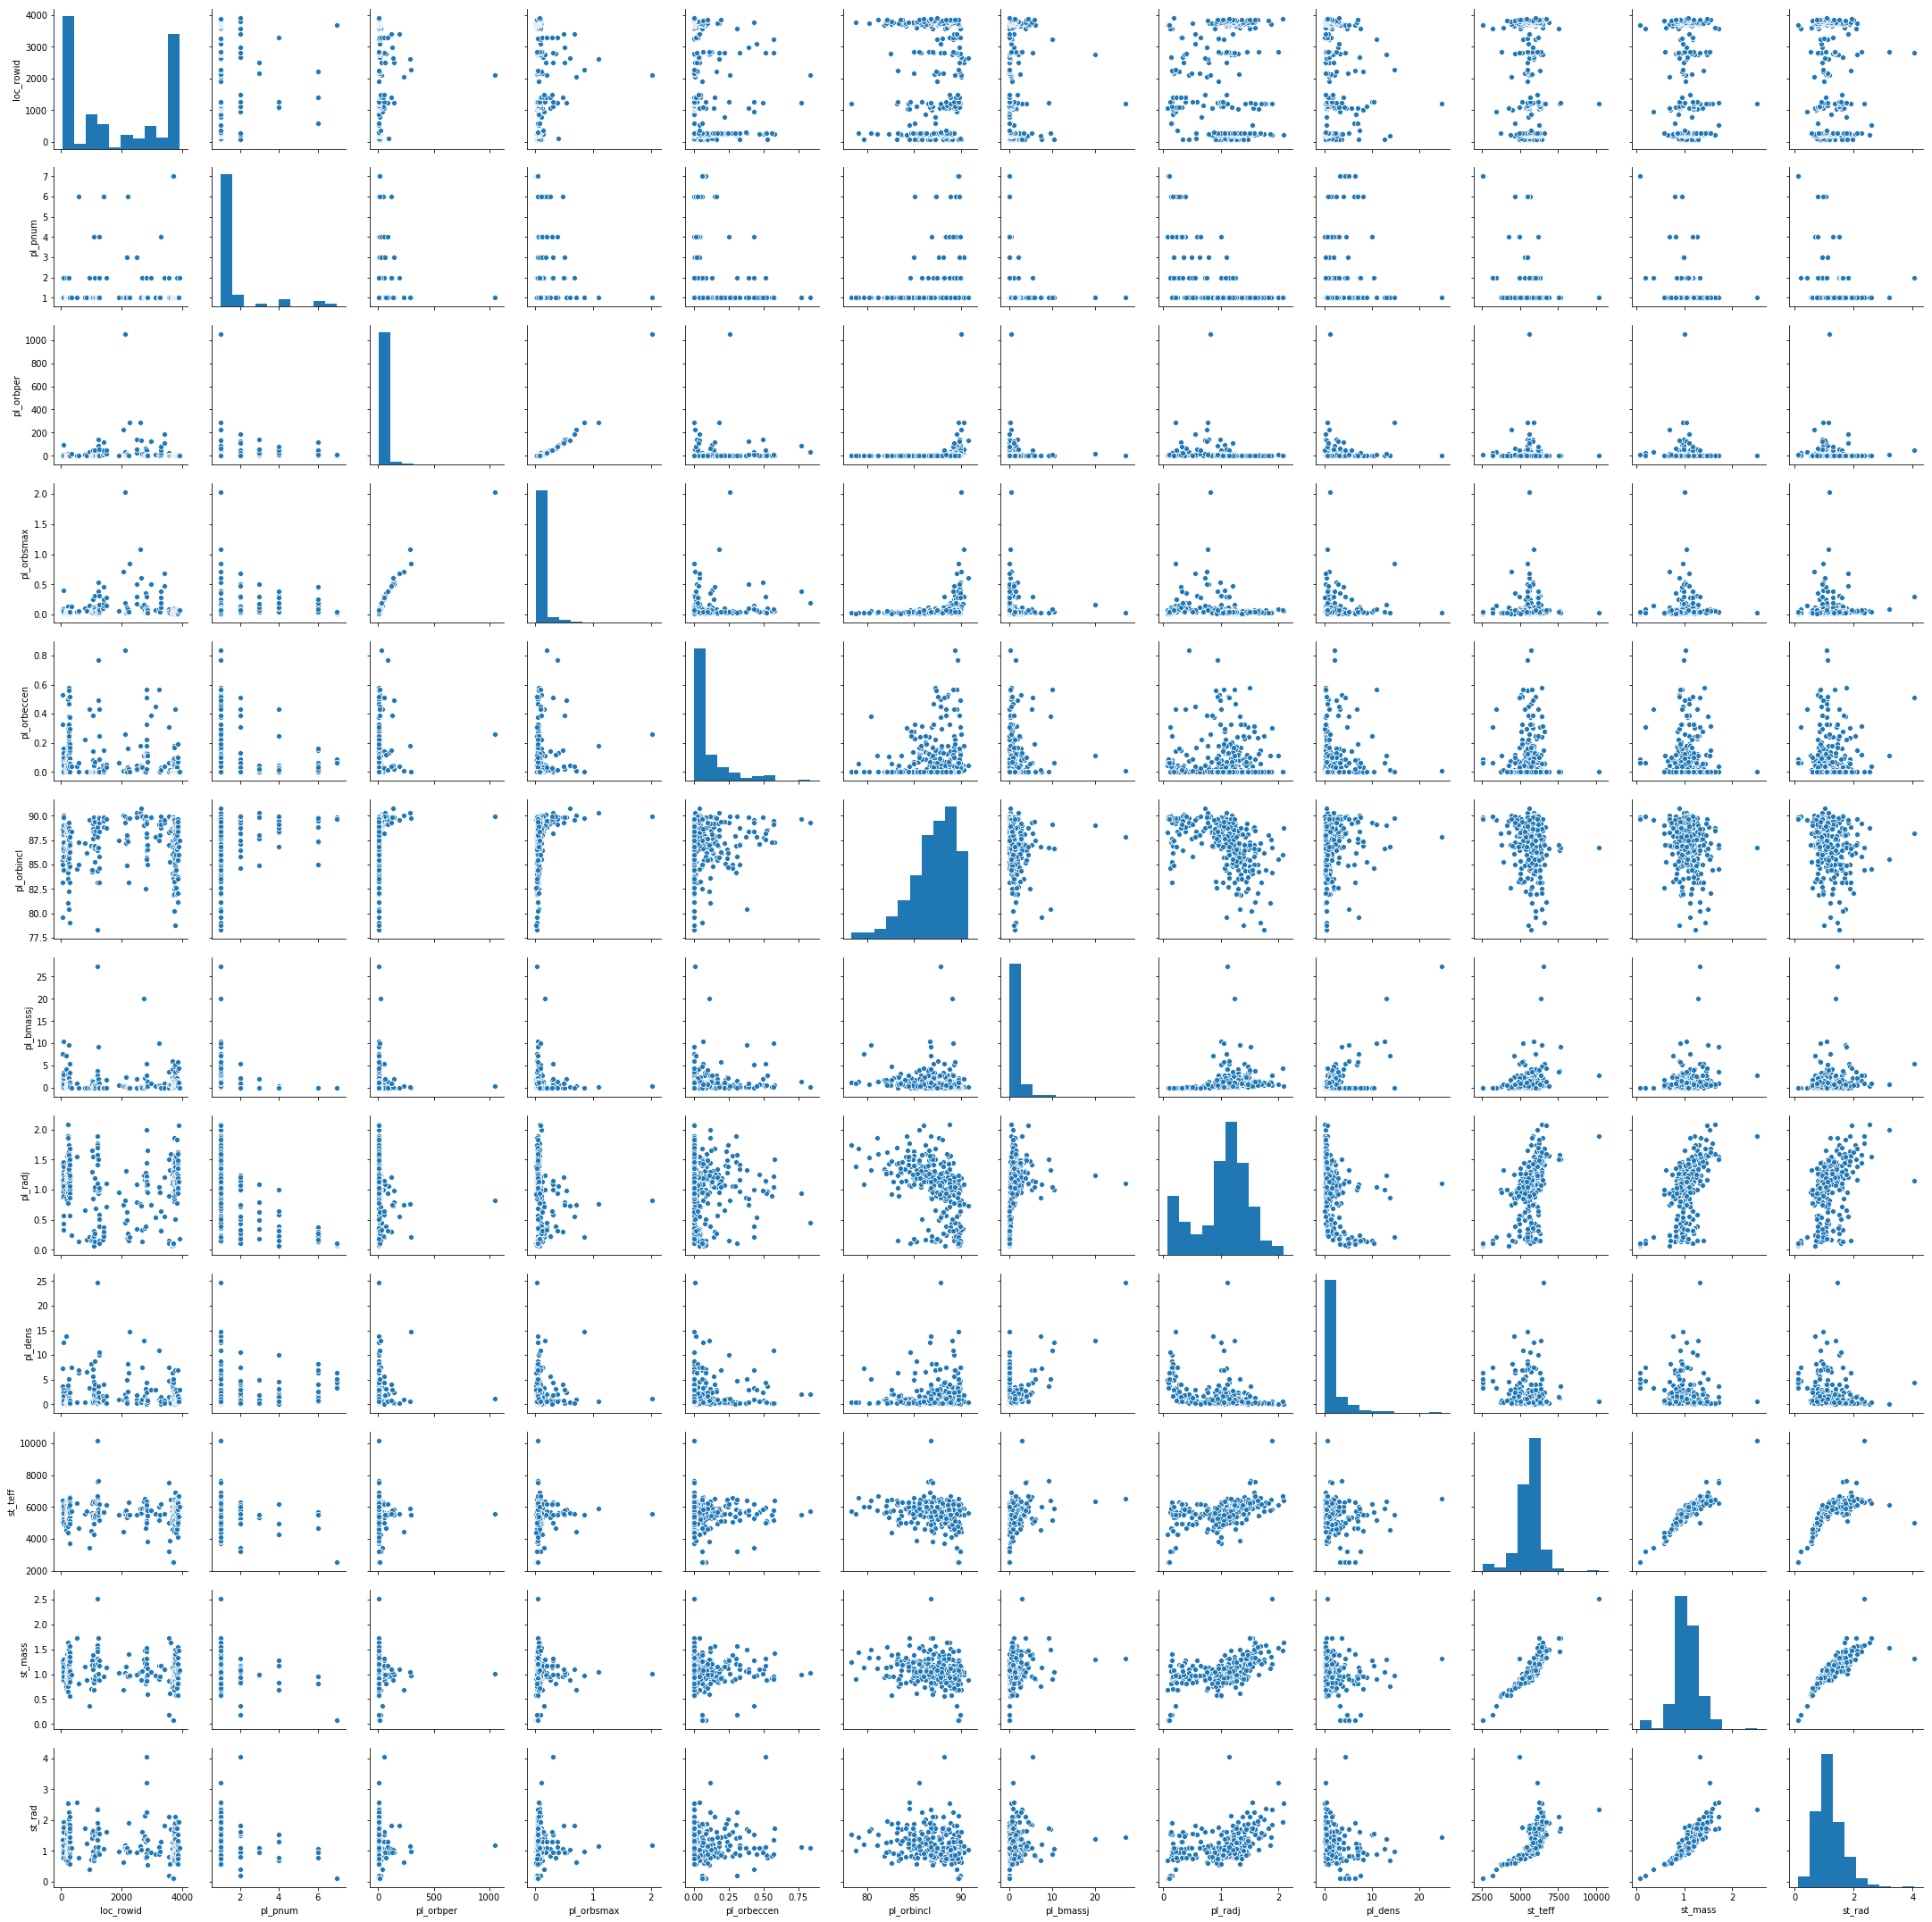

In [17]:
exoplanets_df = exoplanets_df.dropna()
sns.pairplot(exoplanets_df)

## Astronauts data
### The most common Undergraduate Major for Astronauts and does that differ by Gender?

In [9]:
astronauts_df['Undergraduate Major'].value_counts().head()

Physics                     35
Aerospace Engineering       33
Mechanical Engineering      30
Aeronautical Engineering    28
Electrical Engineering      23
Name: Undergraduate Major, dtype: int64

In [10]:
astronauts_df['Gender'].value_counts()

Male      307
Female     50
Name: Gender, dtype: int64

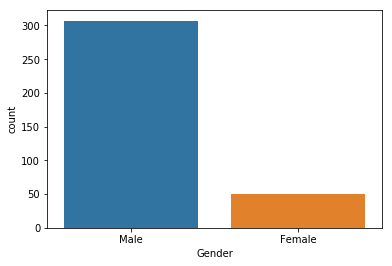

In [11]:
sns.countplot(x='Gender', data=astronauts_df)

/Users/limwenhau/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


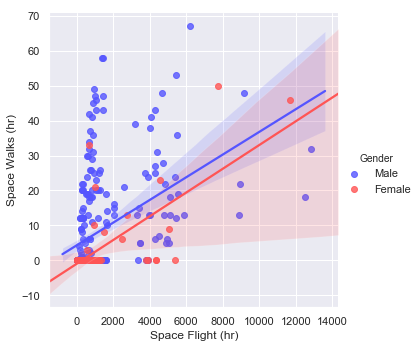

In [138]:
sns.set_context('notebook')
sns.lmplot(x='Space Flight (hr)', y='Space Walks (hr)', data=astronauts_df, hue='Gender',
          palette='seismic')

In [12]:
astronauts_df.pivot_table(index = ['Gender','Military Branch'],values = ['Space Flight (hr)'],aggfunc = [np.mean,len])

mean               len
                                       Space Flight (hr) Space Flight (hr)
Gender Military Branch                                                    
Female US Air Force                          2531.500000                 2
       US Air Force (Retired)                2042.666667                 3
       US Army (Retired)                      999.000000                 1
       US Naval Reserves                      711.000000                 1
       US Navy                               2922.000000                 3
       US Navy (Retired)                      667.000000                 3
Male   US Air Force                          1509.000000                19
       US Air Force (Retired)                 784.827586                58
       US Air Force Reserves                  241.500000                 2
       US Air Force Reserves (Retired)       1739.333333                 3
       US Army                               2145.500000                 4
       US Army (Retired)                     2963.250000                12
       US Coast Guard (Retired)              2411.500000                 2
       US Marine Corps                        314.000000                 3
       US Marine Corps (Retired)              710.882353                17
       US Marine Corps Reserves               506.000000                 2
       US Naval Reserves                     1548.000000                 1
       US Naval Reserves (Retired)           4880.000000                 1
       US Navy                                980.444444                18
       US Navy (Retired)                     1270.321429                56

## The most popular name for astronauts

In [13]:
astronauts_df['Name'].apply(lambda name : name.split(' ')[0]).value_counts().head()

Michael    16
James      15
John       13
Robert     12
William    12
Name: Name, dtype: int64

## The university that hosted the most astronauts

In [14]:
astronauts_df['Universities'] = astronauts_df['Alma Mater'].astype(str).apply(lambda uni :uni.split(';'))


In [15]:
all_unis = []
for unis in astronauts_df['Universities']:
    for uni in unis:
        all_unis.append(uni)

all_unis = pd.DataFrame(data=all_unis)
all_unis[0].value_counts().head(5)

US Naval Academy                 52
US Air Force Academy             38
 US Naval Postgraduate School    31
 MIT                             24
US Military Academy              18
Name: 0, dtype: int64

In [16]:
astronauts_df.dropna(subset=['Military Rank','Gender'], inplace=True)

In [17]:
astronauts_df.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Universities
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,"[US Military Academy, Princeton University]"
3,Thomas D. Akers,1987.0,12.0,Retired,5/20/1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,[University of Missouri-Rolla]
4,Buzz Aldrin,1963.0,3.0,Retired,1/20/1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,"[US Military Academy, MIT]"
5,Andrew M. Allen,1987.0,12.0,Retired,8/4/1955,"Philadelphia, PA",Male,Villanova University; University of Florida,Mechanical Engineering,Business Administration,Lieutenant Colonel,US Marine Corps (Retired),3,906,0,0.0,"STS-46 (Atlantis), STS-62 (Columbia), STS-75 (...",NaN,NaN,"[Villanova University, University of Florida]"
7,Scott D. Altman,1995.0,15.0,Retired,8/15/1959,"Lincoln, IL",Male,University of Illinois; US Naval Postgraduate ...,Aeronautical & Astronautical Engineering,Aeronautical Engineering,Captain,US Navy (Retired),4,1236,0,0.0,"STS-90 (Columbia), STS-106 (Atlantis), STS-109...",NaN,NaN,"[University of Illinois, US Naval Postgraduat..."


/Users/limwenhau/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


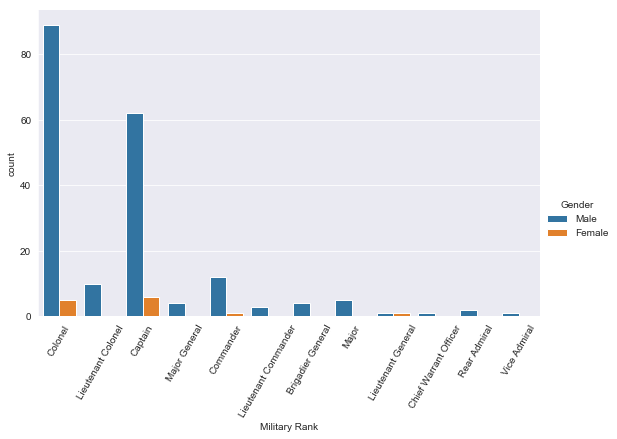

In [18]:
sns.set_style('darkgrid')
# sns.countplot(x='Military Rank', hue='Gender', data=astronauts_df)
g = sns.factorplot("Military Rank", hue='Gender', data=astronauts_df, aspect=1.5, kind="count")
g.set_xticklabels(rotation=60)

/Users/limwenhau/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

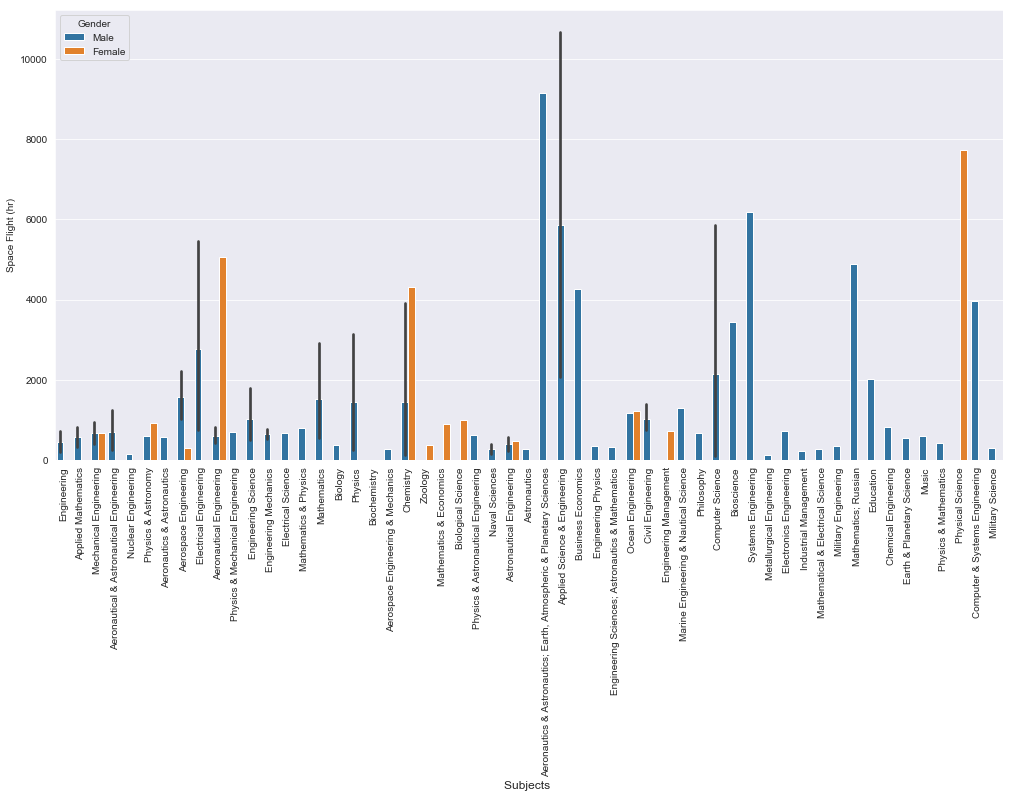

In [19]:
a4_dims = (17, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(ax=ax, x=astronauts_df['Undergraduate Major'], y=astronauts_df['Space Flight (hr)'], data=astronauts_df, hue='Gender')
plt.xlabel('Subjects ', fontsize=12)
plt.xticks(rotation='vertical')

### Nothing much to be shown in the Astronauts data. Except for the fact that there is a huge discrepency in gender

## UFO and Earthquake location comparison 

/Users/limwenhau/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


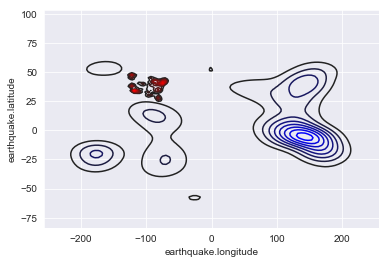

In [20]:
# ufo_df['latitude']=ufo_df['latitude'].str.replace('q',"").astype(float)
ufo_df = ufo_df.dropna()

sns.kdeplot(ufo_df['longitude'], ufo_df['latitude'], color='red')
sns.kdeplot(earthquakes_df['earthquake.longitude'], earthquakes_df['earthquake.latitude'], color="blue")

## Fireball and UFO sightings comparison

/Users/limwenhau/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


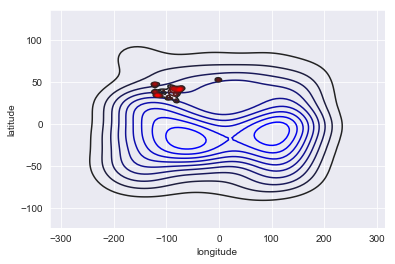

In [141]:
sns.kdeplot(fireball_df['Longitude'], fireball_df['Latitude'], color='blue')
sns.kdeplot(ufo_df['longitude'], ufo_df['latitude'], color='red')

## Meteorite and UFO sightings

/Users/limwenhau/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


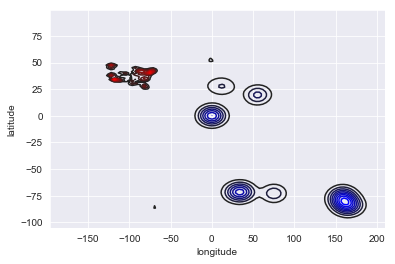

In [21]:
meteorite_df = meteorite_df.dropna()
sns.kdeplot(meteorite_df['reclong'], meteorite_df['reclat'], color='blue')
sns.kdeplot(ufo_df['longitude'], ufo_df['latitude'], color='red')

## Meteorite and Earthquake

/Users/limwenhau/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


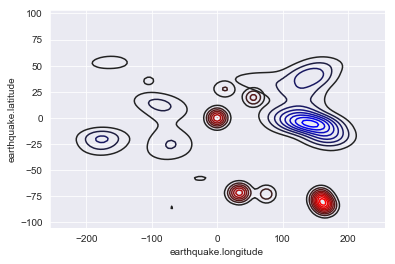

In [153]:
sns.kdeplot(meteorite_df['reclong'], meteorite_df['reclat'], color='red')
sns.kdeplot(earthquakes_df['earthquake.longitude'], earthquakes_df['earthquake.latitude'], color="blue")

## Explonatory analysis on Earthquake data

In [22]:
earthquakes_df.head()

,earthquake.time,earthquake.latitude,earthquake.longitude,earthquake.mag,earthquake.place,MoonPhase.dynamic,MoonPhase.value,MoonPhase.total,MoonPhase.percent,MoonPhase.illumination,...,Neptune.housenumber,Pluto.longitude,Pluto.latitude,Pluto.rectascension,Pluto.declination,Pluto.azimuth,Pluto.height,Pluto.speed,Pluto.house,Pluto.housenumber
0,2016-04-29T01:33:38.940Z,10.2705,-103.7150,6.6,Northern East Pacific Rise,dsc,21.102878,29.530588,71.461083,28.538917,...,4.855731,287.456664,1.458687,288.717312,-20.849043,294.602418,-60.711436,-0.004875,62.774958,3.092499
1,2016-04-28T19:33:24.420Z,-16.0743,167.3926,7.0,1km SE of Norsup_Vanuatu,dsc,20.801902,29.530588,70.441882,29.558118,...,10.821472,287.458035,1.458864,288.718743,-20.848692,75.715379,61.913464,-0.005482,242.688552,9.089618
2,2016-04-20T08:33:47.600Z,0.6359,-80.2083,6.2,19km WNW of Muisne_Ecuador,asc,13.041587,29.530588,44.162976,88.325952,...,12.866854,287.484120,1.466467,288.745387,-20.837893,306.628344,52.338472,-0.000961,301.730362,11.057679
3,2016-04-16T23:58:37.280Z,0.3715,-79.9398,7.8,27km SSE of Muisne_Ecuador,asc,10.108874,29.530588,34.231876,68.463751,...,5.254719,287.484562,1.469462,288.745447,-20.834871,322.775621,-63.936274,0.000967,73.503629,3.450121
4,2016-04-15T16:25:06.260Z,32.7820,130.7259,7.0,1km WSW of Kumamoto-shi_Japan,asc,8.803186,29.530588,29.810397,59.620794,...,2.162465,287.483388,1.470527,288.744056,-20.833960,299.716096,6.217801,0.001607,350.113718,12.670457


/Users/limwenhau/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


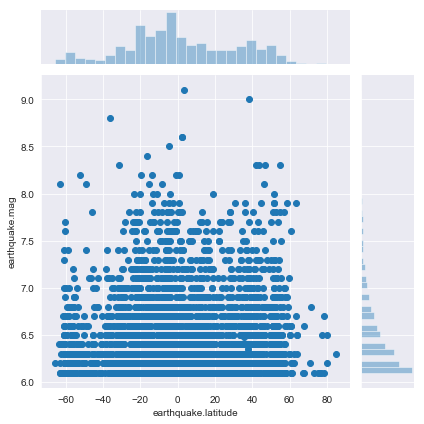

In [27]:
sns.jointplot(x=earthquakes_df['earthquake.latitude'], y=earthquakes_df['earthquake.mag'])

## Linear Regression on Earthquake data

In [113]:
earthquakes_df=earthquakes_df.select_dtypes(['number'])
y = earthquakes_df['earthquake.latitude']
X = earthquakes_df.drop(['earthquake.latitude'], axis=1)

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lm = LinearRegression()

In [118]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
print('Coefficient: \n', lm.coef_)

Coefficient: 
 [-1.65586314e-03  2.95576382e-01  8.00334135e+10  7.45106689e+08
 -2.36343376e+10  6.48122922e-03  3.66747089e-03 -2.49512630e+04
 -1.46033701e-03 -1.22254372e-01 -2.95639038e-03  6.12421036e-02
  2.01510547e+02  1.33521240e+05 -4.00563710e+06 -2.12073326e-03
  8.11526567e-01  1.69277191e-03 -4.76956367e-03 -2.40135193e-03
 -1.86249018e-02 -9.62530077e-02 -6.56829767e+04  1.97048940e+06
  5.68389893e-03 -2.64909601e-01 -5.90515137e-03  4.90937233e-02
  1.53827667e-03 -8.45003128e-03 -7.14122802e-02 -7.71555812e+04
  2.31466736e+06  4.53186035e-03 -1.18001342e-01 -3.48281860e-03
  3.39241028e-02  1.17683411e-03 -2.66933441e-03 -2.01841712e-01
 -5.24034958e+04  1.57210489e+06  8.14819336e-03 -6.52385950e-02
 -4.43649292e-03  2.23698616e-02 -1.75094604e-03 -1.00998878e-02
  1.54496327e-01 -2.15667348e+05  6.47002045e+06 -5.33580780e-03
 -6.56566530e-01  5.39875031e-03  2.91254520e-02  7.99179077e-04
 -1.15418434e-02 -1.41532962e+00 -5.91961887e+04  1.77588567e+06
 -5.061142

In [120]:
predictions = lm.predict(X_test)

### Showing huge correlation 

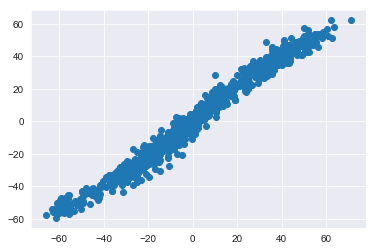

In [121]:
plt.scatter(y_test, predictions)

In [126]:
from sklearn import metrics

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predictions))
print('Mean Average Error: ', metrics.mean_absolute_error(y_test, predictions))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
metrics.explained_variance_score(y_test, predictions)

Mean Squared Error:  19.106571316389363
Mean Average Error:  3.4277292893990303
Root Mean Square Error:  4.371106417875154


0.9774924124539124

### Normal distribution spread which means a good predictor of latitude

/Users/limwenhau/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


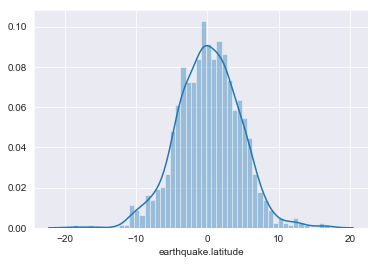

In [127]:
sns.distplot(y_test-predictions, bins=50)

In [139]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, ['Coef'])
coeff_df

,Coef
earthquake.longitude,-1.655863e-03
earthquake.mag,2.955764e-01
MoonPhase.value,8.003341e+10
MoonPhase.total,7.451067e+08
MoonPhase.percent,-2.363434e+10
MoonPhase.illumination,6.481229e-03
Sun.longitude,3.667471e-03
Sun.latitude,-2.495126e+04
Sun.rectascension,-1.460337e-03
Sun.declination,-1.222544e-01


### Only latitude seem to do the trick, longitude does not show much correlation with predictions scattered all around. From the coefficient shown above, it shows that the House Number of each planet and Moon Phase seems to affect the location the most 